# ***Text Generation by Recurrent Neural Network***
---
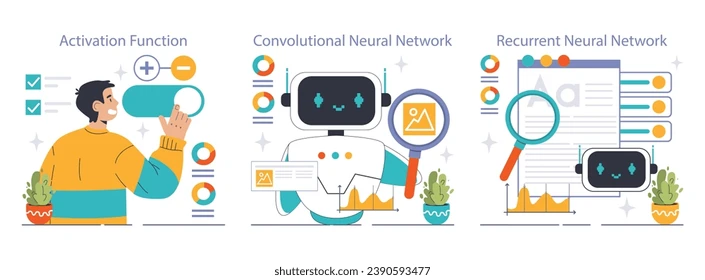

# Data PreProcessing & Manipulation

## Import Essentials :

- **Libraries Imported**:
  - `numpy`: Used for numerical operations, specifically for handling arrays, which are crucial for data manipulation in machine learning.
  - `tensorflow` & `keras`: Libraries essential for building and training deep learning models. Keras acts as a high-level API for TensorFlow.

- **Sequential Model**:
  - `Sequential`: A linear stack of layers, used for building neural networks where one layer feeds into the next sequentially.

- **Key Layers Used**:
  - `Dense`: Fully connected layer, used typically at the output layer of the model to make predictions.
  - `Embedding`: Converts input data (e.g., words) into dense vectors of fixed size. Essential for word embeddings in text generation tasks.
  - `SimpleRNN`: A Recurrent Neural Network layer. It processes sequential data (e.g., text) by maintaining an internal state, which helps the model "remember" previous inputs.
  - `Flatten`: Flattens the input, converting multi-dimensional input into 1D, often used before passing data to fully connected layers.
  - `InputLayer` & `Input`: Define the input shape of the model.

- **Optimizers**:
  - `RMSprop`: Optimizer used for recurrent neural networks, often effective in handling the vanishing gradient problem during training.
  - `Adam`: Another optimizer often used for training deep learning models, combining the advantages of RMSprop and AdaGrad.



In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import  Dense, Embedding, SimpleRNN, Flatten, InputLayer,Input, SimpleRNN
from keras.optimizers import RMSprop, Adam

## Loading & Manipulating Input Text

- **File Uploading**:
  - `tf.keras.utils.get_file`: Downloads a file from a given URL and stores it in the system's cache. In this case, the file is `shakespeare.txt`, which contains the text data (Shakespeare's works) used for text generation.

- **Reading and Decoding Text**:
  - `open(path_to_file, 'rb').read()`: Reads the file in binary mode (`'rb'`) to avoid encoding issues, and then the content is stored in `txt`.
  - `txt.decode('utf-8')`: Decodes the binary data to readable UTF-8 encoded text, making it suitable for processing and analysis.

- **Text Analysis**:
  - **Length of the Text**:
    - `len(txt)`: Calculates the total number of characters in the extracted text, providing the corpus size for training the RNN.
    - `print(f"Length of the text: {len(txt)} characters")`: Displays the total number of characters.
  
  - **Displaying First 300 Characters**:
    - `txt[:300]`: Slices and prints the first 300 characters from the text. This helps in understanding the content and structure of the dataset.
  
  - **Unique Characters**:
    - `vocab = sorted(list(set(txt)))`:
      - **Set**: Converts the text into a set to filter out repeated characters, since sets do not allow duplicates.
      - **Sorted List**: Sorts the set into a list to make the unique characters usable for model training.
      - The unique characters in the text serve as the vocabulary for the text generation model.
  
  - **Vocabulary Information**:
    - `len(vocab)`: Calculates and prints the number of unique characters in the dataset.
    - `print(vocab)`: Displays the unique characters, which include letters, punctuation, and other symbols.



In [2]:
#Uploading a file
path_to_file = tf.keras.utils.get_file('shakespeare.txt', 'https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt')

1115394/1115394 [==============================] - 0s 0us/step


In [3]:
#Extracting text from uploadedfile
txt=open(path_to_file,'rb').read()
#Decoding the extracted text
txt=txt.decode(encoding='utf-8')

In [4]:
#Analyzing the extracted decoded txt

#No. of chars in txt
print(f"Length of the text: {len(txt)} characters\n{'-'*50}")

# Displaying first  300 characters
print(f"First 300 character are as follows:\n{txt[:300]}")

Length of the text: 1115394 characters
--------------------------------------------------
First 300 character are as follows:
First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.

All:
We know't, we know't.

First Citizen:
Let us


In [5]:
#unique characters
vocab=sorted(list(set(txt))) #Converting txt to set 'cause set doesn't allow repetition thus we can easily get all the unique chars
print(f"The total number of unique characters are: {len(vocab)}")
print(vocab)

The total number of unique characters are: 65
['\n', ' ', '!', '$', '&', "'", ',', '-', '.', '3', ':', ';', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


##**Mapping the input data**

- Index to Char
- Char to Index
- Index to Txt
- Txt to Index

## Explanation:

- **Mapping Characters to Indices**:
  - `index2char = {index: char for index, char in enumerate(vocab)}`:
    - Creates a dictionary where each unique character in the vocabulary (`vocab`) is assigned an index.
    - This dictionary is used to map indices back to characters, which is important during the text generation process when predicted indices need to be converted back to characters.

  - `char2index = {char: index for index, char in enumerate(vocab)}`:
    - Another dictionary that reverses the mapping, associating each character with its corresponding index.
    - This is crucial for converting the text data into a format that can be fed into the model, i.e., numerical indices instead of raw characters.

- **Converting Text to Indices**:
  - `txt_to_index = np.array([char2index[char] for char in txt])`:
    - Transforms the entire text into a sequence of numerical indices using the `char2index` dictionary.
    - Each character in the text is replaced by its corresponding index, allowing the text to be processed by the RNN, which operates on numerical data.
    - `np.array`: The resulting list of indices is converted into a NumPy array for efficient manipulation and model input.
  
  - `print(txt_to_index.shape)`:
    - Displays the shape of the resulting array, showing the total number of characters in the text as indices.

- **Converting Indices to Text**:
  - `def index2txt(index):`:
    - Defines a function that converts a sequence of indices back into text.
    - `''.join(index2char[index])`: Joins the characters corresponding to the indices back into a string.
    - `repr`: Displays the string in a representation format, which includes escape sequences (like `\n` for new lines).




In [6]:
#Index to char
index2char={index:char for index,char in enumerate(vocab)}
#Char to index
char2index={char:index for index,char in enumerate(vocab)}

#Txt to index
txt_to_index=np.array([char2index[char] for char in txt])
print(txt_to_index.shape)

#Indices to txt
def index2txt(index):
  return repr(''.join(index2char[index]))

(1115394,)


## Create training examples and targets



- **Generating Sequences**:
  - **Parameters**:
    - `maxlen = 40`: Defines the length of each sequence of text that will be used as input for training. Each sequence contains 40 characters.
    - `step = 3`: The step size for moving the window across the text. The sequence window moves 3 characters at a time to generate overlapping sequences.

  - **Creating Sequences and Labels**:
    - **Lists Initialization**:
      - `sentences = []`: A list to store sequences of text.
      - `next_chars = []`: A list to store the character immediately following each sequence.

    - **Loop for Sequence Generation**:
      - `for i in range(0, len(txt) - maxlen, step)`: Iterates over the text with a window of `maxlen` characters and a step size of `step`.
        - `sentences.append(txt[i: i + maxlen])`: Extracts a sequence of `maxlen` characters starting from position `i` and appends it to `sentences`.
        - `next_chars.append(txt[i + maxlen])`: Appends the character immediately following the sequence to `next_chars`.

  - **Output**:
    - `print(f"No. of sequences: {len(sentences)}")`: Prints the number of generated sequences, indicating how many sequences the RNN will be trained on.
    - `print(f"Len of next_chars: {len(next_chars)}")`: Prints the length of `next_chars`, which should be equal to the number of sequences, showing the number of target characters for training.
    - `print(len(txt) - maxlen)`: Shows the total number of possible sequences in the text, providing insight into the data coverage.




In [7]:
#Generating Sequences
maxlen = 40
step = 3
sentences = []
next_chars = []

for i in range(0, len(txt) - maxlen, step):
    sentences.append(txt[i: i + maxlen])
    next_chars.append(txt[i + maxlen])

In [8]:
print(f"No. of sequences: {len(sentences)}")
print(f"Len of nex_chars: {len(next_chars)}")
print(len(txt) - maxlen)

No. of sequences: 371785
Len of nex_chars: 371785
1115354


## **Vectorization**


  - **Creating Numerical Format Data**:
    - `x = np.zeros((len(sentences), maxlen, len(vocab)), dtype=np.bool_)`:
      - Initializes a NumPy array `x` with shape `(number_of_sequences, sequence_length, vocabulary_size)`.
      - **Number of Sequences**: `len(sentences)`
      - **Sequence Length**: `maxlen`
      - **Vocabulary Size**: `len(vocab)`
      - Each element is a boolean (`dtype=np.bool_`), used to represent the presence of a character in the sequence.

    - `y = np.zeros((len(sentences), len(vocab)), dtype=np.bool_)`:
      - Initializes a NumPy array `y` with shape `(number_of_sequences, vocabulary_size)`.
      - Each element is a boolean (`dtype=np.bool_`), representing the target character for each sequence.

  - **Filling the Data**:
    - **Loop through Sequences**:
      - `for i, sentence in enumerate(sentences)`: Iterates over each sequence in `sentences`.
        - `for t, char in enumerate(sentence)`: Iterates over each character in the current sequence.
          - `x[i, t, char2index[char]] = 1`: Sets the position corresponding to the character index to 1 in the `x` array, marking the presence of that character.
        - `y[i, char2index[next_chars[i]]] = 1`: Sets the position corresponding to the next character index to 1 in the `y` array, marking the target character for the sequence.

  - **Output**:
    - `print(f"Shape of x is : {x.shape}")`: Prints the shape of the `x` array, which confirms the dimensions of the input data.
    - `print(f"Shape of y is : {y.shape}")`: Prints the shape of the `y` array, confirming the dimensions of the target data.
    - `print(f"{'-'*50}\nx[0] is given as:\n{x[0]}")`: Displays the one-hot encoded representation of the first sequence.
    - `print(f"{'-'*50}\ny[0] is given as:\n{y[0]}")`: Displays the one-hot encoded representation of the target character for the first sequence.



In [9]:
# Convert data to numerical format
x = np.zeros((len(sentences), maxlen, len(vocab)), dtype=np.bool_)
y = np.zeros((len(sentences), len(vocab)), dtype=np.bool_)

for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char2index[char]] = 1
    y[i, char2index[next_chars[i]]] = 1

#i: index of sentences
#t: index of char in ith sentence
#char2index -> index of that specific char in the vocab list

In [10]:
print(f"Shape of x is : {x.shape}")
print(f"Shape of y is : {y.shape}")
print(f"{'-'*50}\nx[0] is given as:\n{x[0]}")
print(f"{'-'*50}\ny[0] is given as:\n{y[0]}")

Shape of x is : (371785, 40, 65)
Shape of y is : (371785, 65)
--------------------------------------------------
x[0] is given as:
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
--------------------------------------------------
y[0] is given as:
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False  True False
 False False False False False]


#1. ***Text Generation via Stacked & Simple RNN***

#Task:
 Using a dataset of your choice (e.g., text, time-series data), implement a basic RNN model. Train the model to perform a sequence task such as text generation, sentiment analysis, or time-series prediction.
#Deliverable:
   Perform this experimentation in a notebook and provide a detailed explanation or comments.


##**Model Creation Function**:
  - `create_stacked_rnn_model(vocab_size, embedding_dim, sequence_length, rnn_units)`:
    - Defines a function to create a stacked Recurrent Neural Network (RNN) model for text generation.
    - **Parameters**:
      - `vocab_size`: Number of unique characters in the vocabulary.
      - `embedding_dim`: Dimensionality of the embedding space (not used in this specific function but typically used for embedding layers).
      - `sequence_length`: Length of input sequences for the RNN.
      - `rnn_units`: Number of units in each RNN layer.

- **Model Architecture**:
  - **Input Layer**:
    - `InputLayer(input_shape=(sequence_length, vocab_size))`:
      - Specifies the input shape for the model. Here, `sequence_length` is the length of each input sequence, and `vocab_size` is the number of features per character (one-hot encoded).

  - **RNN Layers**:
    - `SimpleRNN(units=256, return_sequences=True)` (First Layer):
      - The first RNN layer with 256 units and `return_sequences=True` outputs the full sequence of hidden states.
    - `SimpleRNN(units=256, return_sequences=True)` (Second Layer):
      - The second RNN layer, also with 256 units, maintains the sequence output.
    - `SimpleRNN(units=256)` (Third Layer):
      - The third RNN layer with 256 units processes the sequence and returns the final hidden state.

  - **Output Layer**:
    - `Dense(units=vocab_size, activation='softmax')`:
      - The output layer with `vocab_size` units (equal to the number of unique characters) and a `softmax` activation function. This layer outputs probabilities for each character, allowing the model to predict the next character in the sequence.

- **Model Summary**:
  - `stacked_rnn.summary()`:
    - Provides a summary of the model architecture, including layer types, output shapes, and parameter counts.
  
  - **Summary Output**:
    - **Layers**:
      - `simple_rnn_26 (SimpleRNN)`: Output shape `(None, 40, 256)` with 82,432 parameters.
      - `simple_rnn_27 (SimpleRNN)`: Output shape `(None, 40, 256)` with 131,328 parameters.
      - `simple_rnn_28 (SimpleRNN)`: Output shape `(None, 256)` with 131,328 parameters.
      - `dense_9 (Dense)`: Output shape `(None, 65)` with 16,705 parameters.
    - **Total Parameters**: 361,793 (1.38 MB), all of which are trainable.





In [11]:
# Step 2: Build the model
def create_stacked_rnn_model(vocab_size, embedding_dim,sequence_length, rnn_units):
    model = Sequential([
        # Input layer
        InputLayer(input_shape=(sequence_length, vocab_size)),

        # First SimpleRNN layer
        SimpleRNN(units=256, return_sequences=True),

        # Second SimpleRNN layer
        SimpleRNN(units=256, return_sequences=True),

        # Third SimpleRNN layer
        SimpleRNN(units=256),

        # Output layer
        Dense(units=vocab_size, activation='softmax')
    ])

    return model
stacked_rnn=create_stacked_rnn_model(
    vocab_size=len(vocab),
    embedding_dim=256,
    sequence_length=maxlen,
    rnn_units=256

    )


stacked_rnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 40, 256)           82432     
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 40, 256)           131328    
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 256)               131328    
                                                                 
 dense (Dense)               (None, 65)                16705     
                                                                 
Total params: 361793 (1.38 MB)
Trainable params: 361793 (1.38 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Compiling the Stacked RNN Model

- **Optimizer Setup**:
  - `optimizer = RMSprop(learning_rate=0.01)`:
    - Initializes the RMSprop optimizer with a learning rate of 0.01.
    - **RMSprop**: An adaptive learning rate optimizer, which helps in handling the vanishing gradient problem and stabilizing training for RNNs by adjusting the learning rate based on recent gradient magnitudes.

- **Model Compilation**:
  - `stacked_rnn.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])`:
    - **Loss Function**: `loss='categorical_crossentropy'`
      - Used for multi-class classification problems. Measures the performance of the model by comparing the predicted probabilities with the actual class labels.
      - Suitable for text generation tasks where the model predicts probabilities for each character in the vocabulary.

    - **Optimizer**: `optimizer=optimizer`
      - Specifies the RMSprop optimizer to be used for training the model.

    - **Metrics**: `metrics=['accuracy']`
      - Evaluates the model's performance based on accuracy, which measures the proportion of correct predictions to the total predictions.





In [12]:
# Step 3: Compile the model
optimizer = RMSprop(learning_rate=0.01)
stacked_rnn.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

## **Setting Up Checkpoints for Model Training:**

- **Creating Directory for Checkpoints**:
  - `import os`: Imports the OS module for interacting with the operating system.
  - `os.mkdir('./stacked_rnn_checkpoints')`:
    - Creates a directory named `stacked_rnn_checkpoints` in the current working directory.
    - This directory will be used to store model checkpoints during training.

- **Checkpoint Directory and File Path**:
  - `checkpoint_dir = './stacked_rnn_checkpoints'`:
    - Specifies the path to the directory where model checkpoints will be saved.
  - `checkpoint_path = os.path.join(checkpoint_dir, "ckpt_{epoch}.weights.h5.keras")`:
    - Defines the path and naming convention for the checkpoint files.
    - `ckpt_{epoch}.weights.h5.keras` indicates that each checkpoint file will be named based on the epoch number, allowing for versioning of the model weights.

- **ModelCheckpoint Callback**:
  - `checkpoint = keras.callbacks.ModelCheckpoint(checkpoint_path, monitor='loss', verbose=1, save_best_only=True, mode='min')`:
    - **`checkpoint_path`**: Specifies where the model checkpoints will be saved.
    - **`monitor='loss'`**: Monitors the training loss to determine when to save checkpoints.
    - **`verbose=1`**: Provides detailed logs of checkpoint saving during training.
    - **`save_best_only=True`**: Saves only the model weights that have the lowest loss, ensuring that only the best-performing model is kept.
    - **`mode='min'`**: Configures the callback to save the model when the monitored loss is minimized.




In [13]:
#Making a dir to store checkpoints
import os
os.mkdir('./stacked_rnn_checkpoints')
# Directory where the checkpoints will be saved
checkpoint_dir = './stacked_rnn_checkpoints'
# Name of the checkpoint files
checkpoint_path = os.path.join(checkpoint_dir, "ckpt_{epoch}.weights.h5.keras")

checkpoint = keras.callbacks.ModelCheckpoint(checkpoint_path, monitor='loss', verbose=1, save_best_only=True, mode='min')

## **Training the Stacked RNN Model**

- **Model Training**:
  - `stackedRNN_track = stacked_rnn.fit(x, y, epochs=20, batch_size=128, validation_split=0.2, callbacks=[checkpoint])`:
    - **`stacked_rnn.fit`**:
      - Trains the `stacked_rnn` model using the provided data.
    
    - **Parameters**:
      - `x`: Input data in one-hot encoded format (sequences of characters).
      - `y`: Target data (next characters in one-hot encoded format).
      - `epochs=20`: Number of training epochs. The model will be trained for 20 iterations over the entire dataset.
      - `batch_size=128`: Number of samples per gradient update. Training will process data in batches of 128 sequences at a time.
      - `validation_split=0.2`: Fraction of the training data to be used as validation data (20%). This helps in monitoring the model's performance on unseen data during training.
      - `callbacks=[checkpoint]`: List of callback functions to apply during training. Here, `checkpoint` is used to save model weights based on the lowest loss.

- **Tracking Training**:
  - `stackedRNN_track`:
    - Stores the training history returned by `fit()`, including metrics such as loss and accuracy for each epoch.




In [ ]:
#model training
stackedRNN_track=stacked_rnn.fit(x,y,epochs=20,batch_size=128,validation_split=0.2,callbacks=[checkpoint])

Epoch 1/20
2324/2324 [==============================] - ETA: 0s - loss: 4.0263 - accuracy: 0.0752
Epoch 1: loss improved from inf to 4.02630, saving model to ./stacked_rnn_checkpoints/ckpt_1.weights.h5.keras
2324/2324 [==============================] - 286s 122ms/step - loss: 4.0263 - accuracy: 0.0752 - val_loss: 4.4702 - val_accuracy: 0.0618
Epoch 2/20
2324/2324 [==============================] - ETA: 0s - loss: 3.9905 - accuracy: 0.0796
Epoch 2: loss improved from 4.02630 to 3.99054, saving model to ./stacked_rnn_checkpoints/ckpt_2.weights.h5.keras
2324/2324 [==============================] - 281s 121ms/step - loss: 3.9905 - accuracy: 0.0796 - val_loss: 4.2513 - val_accuracy: 0.0701
Epoch 3/20
2324/2324 [==============================] - ETA: 0s - loss: 3.9890 - accuracy: 0.0809
Epoch 3: loss improved from 3.99054 to 3.98904, saving model to ./stacked_rnn_checkpoints/ckpt_3.weights.h5.keras
2324/2324 [==============================] - 281s 121ms/step - loss: 3.9890 - accuracy: 0.0809

# 2. **Text Generation via Bi-directional RNNs**
##Task:
 Modify your basic RNN model by stacking multiple RNN layers and also converting it into a bi-directional RNN. Analyze the performance improvement (if any) compared to the basic RNN model. (Note: Separate Implementation of Stacked RNN &  Bi-Directional RNN)
## Deliverable:
Perform this experimentation in a notebook and provide a detailed explanation or comments.

## **Building a Bidirectional RNN Model**

- **Building the Bidirectional RNN Model**:
  - `from keras.layers import Bidirectional`:
    - Imports the `Bidirectional` wrapper for RNN layers.

  - **Model Creation Function**:
    - `create_bidirectional_rnn_model(vocab_size, seq_length, embedding_dim, rnn_units)`:
      - Defines a function to create a Bidirectional RNN model for text generation.
      - **Parameters**:
        - `vocab_size`: Number of unique characters in the vocabulary.
        - `seq_length`: Length of input sequences for the RNN.
        - `embedding_dim`: Dimensionality of the embedding space (not used in this specific function but typically used for embedding layers).
        - `rnn_units`: Number of units in each RNN layer.

    - **Model Architecture**:
      - **Input Layer**:
        - `InputLayer(input_shape=(seq_length, vocab_size))`:
          - Specifies the input shape for the model. Each sequence has a length of `seq_length` with `vocab_size` features per character (one-hot encoded).

      - **Bidirectional RNN Layers**:
        - `Bidirectional(SimpleRNN(rnn_units, return_sequences=True))` (First Layer):
          - A Bidirectional RNN layer with `rnn_units` units. The `Bidirectional` wrapper processes the sequence in both forward and backward directions, enhancing context understanding.
          - `return_sequences=True` outputs the full sequence of hidden states.
        - `Bidirectional(SimpleRNN(rnn_units))` (Second Layer):
          - Another Bidirectional RNN layer with `rnn_units` units, providing the final hidden state.

      - **Output Dense Layer**:
        - `Dense(vocab_size, activation='softmax')`:
          - Output layer with `vocab_size` units and a `softmax` activation function. Outputs probabilities for each character, used for predicting the next character in the sequence.

  - **Model Creation**:
    - `bidirectional_rnn = create_bidirectional_rnn_model(...)`:
      - Creates the Bidirectional RNN model with specified parameters.

  - **Model Summary**:
      - `bidirectional_rnn.summary()`:
      - Displays the model architecture, including layer types, output shapes, and parameter counts.

- **Summary Output**:
    - **Bidirectional Layers**:
      - `bidirectional_6 (Bidirectional)`: Output shape `(None, 40, 1024)` with 591,872 parameters.
      - `bidirectional_7 (Bidirectional)`: Output shape `(None, 1024)` with 1,573,888 parameters.
    - **Dense Layer**:
      - `dense_13 (Dense)`: Output shape `(None, 65)` with 66,625 parameters.
    - **Total Parameters**: 2,232,385 (8.52 MB), all of which are trainable.




In [ ]:
#Building a BiDirectional RNN Model
from keras.layers import  Bidirectional

def create_bidirectional_rnn_model(vocab_size, seq_length, embedding_dim, rnn_units):

    model = Sequential([
        # Input layer
        InputLayer(input_shape=(seq_length, vocab_size)),

        #Bidirectional Layer
        Bidirectional(SimpleRNN(rnn_units, return_sequences=True)),

        #Bidirectional Layer
        Bidirectional(SimpleRNN(rnn_units)),

        #output Dense Layer
        Dense(vocab_size, activation='softmax')
    ])
    return model

# Create the bi-directional RNN model
bidirectional_rnn = create_bidirectional_rnn_model(
    vocab_size=len(vocab),
    seq_length=maxlen,
    embedding_dim=256,
    rnn_units=512  # You can adjust the number of units
)


bidirectional_rnn.summary()

## **Compiling the Model**:
  - `bidirectional_rnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])`:
    - **Optimizer**: `adam`
      - Uses the Adam optimizer, which is an adaptive learning rate optimization algorithm.
    - **Loss Function**: `categorical_crossentropy`
      - Measures the performance of the model by comparing the predicted probabilities with the actual class labels.
    - **Metrics**: `accuracy`
      - Evaluates the model's performance based on accuracy.

In [ ]:
# Step 3: Compile the model

bidirectional_rnn.compile(optimizer ='adam',loss='categorical_crossentropy', metrics=['accuracy'])

## **Setting Up Checkpoints for Bidirectional RNN Training**

- **Creating Directory for Checkpoints**:
  - `import os`: Imports the OS module for interacting with the operating system.
  - `os.mkdir('./Bidirectional_RNN_checkpoints')`:
    - Creates a directory named `Bidirectional_RNN_checkpoints` in the current working directory.
    - This directory will be used to store model checkpoints during training.

- **Checkpoint Directory and File Path**:
  - `checkpoint_dir = './Bidirectional_RNN_checkpoints'`:
    - Specifies the path to the directory where model checkpoints will be saved. Note that this seems to be a different directory name than the one created. This discrepancy should be corrected for consistency.
  - `checkpoint_path = os.path.join(checkpoint_dir, "ckpt_{epoch}.weights.h5.keras")`:
    - Defines the path and naming convention for the checkpoint files.
    - `ckpt_{epoch}.weights.h5.keras` indicates that each checkpoint file will be named based on the epoch number, facilitating version control of the model weights.

- **ModelCheckpoint Callback**:
  - `checkpoint = keras.callbacks.ModelCheckpoint(checkpoint_path, monitor='loss', verbose=1, save_best_only=True, mode='min')`:
    - **`checkpoint_path`**: Specifies where the model checkpoints will be saved.
    - **`monitor='loss'`**: Monitors the training loss to determine when to save checkpoints.
    - **`verbose=1`**: Provides detailed logs of checkpoint saving during training.
    - **`save_best_only=True`**: Saves only the model weights that have the lowest loss, ensuring that only the best-performing model is retained.
    - **`mode='min'`**: Configures the callback to save the model when the monitored loss is minimized.



In [ ]:
#Making a dir to store checkpoints
import os
os.mkdir('./Bidirectional_RNN_checkpoints')
# Directory where the checkpoints will be saved
checkpoint_dir = './Bidirectional_RNN_checkpoints'
# Name of the checkpoint files
checkpoint_path = os.path.join(checkpoint_dir, "ckpt_{epoch}.weights.h5.keras")

checkpoint = keras.callbacks.ModelCheckpoint(checkpoint_path, monitor='loss', verbose=1, save_best_only=True, mode='min')

## **Training the Bidirectional RNN Model**

- **Model Training**:
  - `bidir_track = bidirectional_rnn.fit(x, y, epochs=20, batch_size=128, validation_split=0.2, callbacks=[checkpoint])`:
    - Trains the `bidirectional_rnn` model using the provided data.

    - **Parameters**:
      - `x`: Input data in one-hot encoded format (sequences of characters).
      - `y`: Target data (next characters in one-hot encoded format).
      - `epochs=20`: Number of training epochs. The model will be trained for 20 iterations over the entire dataset.
      - `batch_size=128`: Number of samples per gradient update. Training will process data in batches of 128 sequences at a time.
      - `validation_split=0.2`: Fraction of the training data to be used as validation data (20%). This helps in monitoring the model's performance on unseen data during training.
      - `callbacks=[checkpoint]`: List of callback functions to apply during training. Here, `checkpoint` is used to save model weights based on the lowest loss.

- **Tracking Training**:
  - `bidir_track`:
    - Stores the training history returned by `fit()`, including metrics such as loss and accuracy for each epoch.


In [ ]:
#model training
bidir_track=bidirectional_rnn.fit(x,y,epochs=20,batch_size=128,validation_split=0.2,callbacks=[checkpoint])

# 3. **Exploring Hybrid Architectures**

##Task:
Implement a hybrid architecture by combining your RNN model with another model (e.g., CNN, Attention mechanism). Train this hybrid model on the same dataset and compare its performance with the previous models.
##Deliverable:
Submit the Python code in a notebook for the hybrid model along with a report discussing the results, challenges faced, and the benefits (or drawbacks) of using a hybrid approach.

## **Creating and Summarizing a Hybrid CNN-RNN Model**

- **Model Creation**:
  - `from keras.models import Model`:
    - Imports the `Model` class for defining the model.

  - **Defining the Hybrid Model Function**:
    - `create_hybrid_model(vocab_size, rnn_units, maxlen)`:
      - Function to create a hybrid model combining Convolutional Neural Network (CNN) and Recurrent Neural Network (RNN) components.
      - **Parameters**:
        - `vocab_size`: Number of unique characters in the vocabulary.
        - `rnn_units`: Number of units in the RNN layer.
        - `maxlen`: Length of input sequences.

    - **Model Architecture**:
      - **Input Layer**:
        - `inputs = Input(shape=(maxlen, vocab_size))`:
          - Specifies the input shape: sequences of length `maxlen` with `vocab_size` features (one-hot encoded).

      - **CNN Part**:
        - `conv1 = Conv1D(filters=64, kernel_size=5, activation='relu')(inputs)`:
          - 1D Convolutional layer with 64 filters, a kernel size of 5, and ReLU activation. Extracts features from the input sequences.
        - `pool1 = MaxPooling1D(pool_size=2)(conv1)`:
          - MaxPooling layer reduces the dimensionality of the feature maps, pooling over a window of size 2.

        - `global_pool = GlobalMaxPooling1D()(pool1)`:
          - GlobalMaxPooling layer reduces the sequence length to a single value per feature map by taking the maximum value. This creates a fixed-size representation from variable-length sequences.

      - **RNN Part**:
        - `rnn = SimpleRNN(rnn_units, return_sequences=False)(inputs)`:
          - SimpleRNN layer with `rnn_units` units. `return_sequences=False` outputs the final hidden state for each sequence.

      - **Combining CNN and RNN Outputs**:
        - `concat = Concatenate()([global_pool, rnn])`:
          - Concatenates the outputs from the CNN and RNN parts into a single vector.

      - **Dense Layers**:
        - `dense1 = Dense(128, activation='relu')(concat)`:
          - Dense layer with 128 units and ReLU activation, providing a final learned representation from the combined features.
        - `outputs = Dense(vocab_size, activation='softmax')(dense1)`:
          - Output Dense layer with `vocab_size` units and softmax activation for predicting the next character probabilities.

    - **Creating the Model**:
      - `model = Model(inputs=inputs, outputs=outputs)`:
        - Defines the Keras model using the specified inputs and outputs.

  - **Model Creation**:
    - `hybrid_model = create_hybrid_model(...)`:
      - Instantiates the hybrid model with given parameters.

  - **Model Summary**:
    - `hybrid_model.summary()`:
      - Displays the model architecture including layer types, output shapes, and parameter counts.

    - **Summary Output**:
      - **Conv1D Layer**:
        - `conv1d_21 (Conv1D)`: Output shape `(None, 36, 64)` with 20,864 parameters.
      - **MaxPooling1D Layer**:
        - `max_pooling1d_10`: Output shape `(None, 18, 64)`.
      - **GlobalMaxPooling1D Layer**:
        - `global_max_pooling1d_4`: Output shape `(None, 64)`.
      - **SimpleRNN Layer**:
        - `simple_rnn_49 (SimpleRNN)`: Output shape `(None, 512)` with 295,936 parameters.
      - **Concatenate Layer**:
        - `concatenate_9`: Combines CNN and RNN outputs with output shape `(None, 576)`.
      - **Dense Layers**:
        - `dense_26 (Dense)`: Output shape `(None, 128)` with 73,856 parameters.
        - `dense_27 (Dense)`: Output shape `(None, 65)` with 8,385 parameters.
      - **Total Parameters**: 399,041 (1.52 MB), all trainable.




In [ ]:
from keras.models import Model
from keras.layers import Conv1D, MaxPooling1D, Concatenate, GlobalMaxPooling1D

def create_hybrid_model(vocab_size, rnn_units, maxlen):

    # Input layer (no Embedding layer since input is one-hot encoded)
    inputs = Input(shape=(maxlen, vocab_size))  # Adjust input shape to (40, 65)

    # CNN part
    conv1 = Conv1D(filters=64, kernel_size=5, activation='relu')(inputs)
    pool1 = MaxPooling1D(pool_size=2)(conv1)

    # Reduce sequence length using GlobalMaxPooling1D
    global_pool = GlobalMaxPooling1D()(pool1)

    # RNN part
    rnn = SimpleRNN(rnn_units, return_sequences=False)(inputs)  # Use original one-hot input for RNN

    # Combine CNN and RNN
    concat = Concatenate()([global_pool, rnn])

    # Dense layers
    dense1 = Dense(128, activation='relu')(concat)
    outputs = Dense(vocab_size, activation='softmax')(dense1)

    # Create the model
    model = Model(inputs=inputs, outputs=outputs)

    return model

# Create and train the hybrid model
hybrid_model = create_hybrid_model(
    maxlen=maxlen,
    rnn_units = 512,

    vocab_size=len(vocab)
)
hybrid_model.summary()

## **Compiling the Model**:
  - `bidirectional_rnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])`:
    - **Optimizer**: `adam`
      - Uses the Adam optimizer, which is an adaptive learning rate optimization algorithm.
    - **Loss Function**: `categorical_crossentropy`
      - Measures the performance of the model by comparing the predicted probabilities with the actual class labels.
    - **Metrics**: `accuracy`
      - Evaluates the model's performance based on accuracy.

In [ ]:
#compile the model
hybrid_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## **Setting Up Checkpoints for Hybrid CNN-RNN Model**

- **Creating Directory for Checkpoints**:
  - `import os`: Imports the OS module for filesystem operations.
  - `os.mkdir('./HybridModel_checkpoints')`:
    - Creates a directory named `HybridModel_checkpoints` in the current working directory.
    - This directory will store the checkpoints during the training of the hybrid model.

- **Checkpoint Directory and File Path**:
  - `checkpoint_dir = './HybridModel_checkpoints'`:
    - Specifies the path to the directory where model checkpoints will be saved.
  - `checkpoint_path = os.path.join(checkpoint_dir, "ckpt_{epoch}.weights.h5.keras")`:
    - Defines the file path and naming convention for the checkpoint files.
    - `ckpt_{epoch}.weights.h5.keras` indicates that each checkpoint file will be named according to the epoch number, allowing for easy tracking of different model versions.

- **ModelCheckpoint Callback**:
  - `checkpoint = keras.callbacks.ModelCheckpoint(checkpoint_path, monitor='loss', verbose=1, save_best_only=True, mode='min')`:
    - **`checkpoint_path`**: Path where the model checkpoints will be saved.
    - **`monitor='loss'`**: Monitors the training loss to decide when to save the model.
    - **`verbose=1`**: Provides detailed output on checkpoint saving during training.
    - **`save_best_only=True`**: Saves only the model weights with the lowest loss, ensuring that the best-performing model is kept.
    - **`mode='min'`**: Configures the callback to save the model whenever the monitored loss decreases, thus ensuring the lowest loss model is saved.




In [ ]:
#Making a dir to store checkpoints
import os
os.mkdir('./HybridModel_checkpoints')
# Directory where the checkpoints will be saved
checkpoint_dir = './HybridModel_checkpoints'
# Name of the checkpoint files
checkpoint_path = os.path.join(checkpoint_dir, "ckpt_{epoch}.weights.h5.keras")

checkpoint = keras.callbacks.ModelCheckpoint(checkpoint_path, monitor='loss', verbose=1, save_best_only=True, mode='min')

## **Training the Bidirectional RNN Model**

- **Model Training**:
  - `bidir_track = bidirectional_rnn.fit(x, y, epochs=20, batch_size=128, validation_split=0.2, callbacks=[checkpoint])`:
    - Trains the `bidirectional_rnn` model using the provided data.

    - **Parameters**:
      - `x`: Input data in one-hot encoded format (sequences of characters).
      - `y`: Target data (next characters in one-hot encoded format).
      - `epochs=20`: Number of training epochs. The model will be trained for 20 iterations over the entire dataset.
      - `batch_size=128`: Number of samples per gradient update. Training will process data in batches of 128 sequences at a time.
      - `validation_split=0.2`: Fraction of the training data to be used as validation data (20%). This helps in monitoring the model's performance on unseen data during training.
      - `callbacks=[checkpoint]`: List of callback functions to apply during training. Here, `checkpoint` is used to save model weights based on the lowest loss.

- **Tracking Training**:
  - `bidir_track`:
    - Stores the training history returned by `fit()`, including metrics such as loss and accuracy for each epoch.


In [ ]:
#model training
track=hybrid_model.fit(x,y,epochs=20,batch_size=128,validation_split=0.2,callbacks=[checkpoint])

#Step 4: Generate Text
- Define a function to generate text based on a given seed text
- Use the trained model to predict the next character at each step
- Append the predicted character to the generated text and update the seed

## **Sample Function**
### Function Definition

This line defines a function named `sample`, which takes two arguments:
- `preds` (the predicted probabilities of the next characters)
- `temperature` (a parameter that controls the randomness of predictions).

### 1. Convert to NumPy Array

This line converts the `preds` input into a NumPy array and ensures that its data type is `float64`. This is important for numerical stability and for performing mathematical operations.

### 2. Logarithm and Temperature Scaling

The logarithm of the predicted probabilities is computed, and then it is divided by the temperature. Lower temperatures (e.g., < 1.0) make the model more confident, leading to less random predictions, while higher temperatures (e.g., > 1.0) increase randomness.

### 3. Exponential of Logarithm

This line calculates the exponential of the scaled log probabilities. This step transforms the log probabilities back to the original scale, but now adjusted by the temperature.

### 4. Normalization

The probabilities are normalized by dividing each value by the sum of all exponentials. This ensures that the resulting probabilities sum to 1, making it a valid probability distribution.

### 5. Sampling from the Distribution

This line uses a multinomial distribution to sample one outcome based on the probabilities in `preds`. The `np.random.multinomial(1, preds, 1)` function returns an array where the index corresponding to the sampled character will have a value of 1, and all others will be 0.

### 6. Return the Index of the Sampled Character

The function returns the index of the character that was sampled by finding the index of the maximum value in the `probas` array. This index corresponds to the next character to be generated.


In [ ]:
# Step 5: Text generation function
def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

## The `generate_text` Function

### Function Definition

This line defines the `generate_text` function, which takes three parameters:
- **`seed_text`**: The initial text to start generation.
- **`num_generated`**: The number of characters to generate.
- **`temperature`**: Controls randomness.

### Initialize Generated Text

The variable `generated_text` is initialized with the `seed_text`. This will be modified as new characters are generated.

### Loop for Character Generation

This line starts a loop that will run `num_generated` times, generating one character in each iteration.

### Prepare Input for the Model

A NumPy array named `encoded_text` is created with shape `(1, seq_length, vocab_size)`, initialized to zeros. This array will hold the one-hot encoded representation of the last `seq_length` characters from `generated_text`.

### Iterate Over the Last `seq_length` Characters

This loop iterates over the last `seq_length` characters of `generated_text`, allowing the model to predict the next character based on this context.

### One-Hot Encoding

For each character in the last `seq_length` characters, this line sets the corresponding index in `encoded_text` to 1, effectively creating a one-hot encoded representation of the input sequence.

### Predict the Next Character

The model is called to predict the next character based on the `encoded_text`. The `verbose=0` argument suppresses output during prediction. The result is a probability distribution over the vocabulary for the next character.

### Sample the Next Character Index

The `sample` function is called with the predicted probabilities and the specified `temperature`. This returns the index of the next character to be generated.

### Get the Next Character

The character corresponding to the sampled index is retrieved from the `index_to_char` mapping.

### Append the Next Character

The newly generated character is appended to `generated_text`, extending the text.

### Return the Generated Text

After the loop completes, the function returns the full generated text.


In [ ]:
def generate_text(model_name,seed_text, num_generated, temperature=0.5):
    generated_text = seed_text
    model=model_name
    for i in range(num_generated):
        encoded_text = np.zeros((1, maxlen, len(vocab)))
        for t, char in enumerate(generated_text[-maxlen:]):
            encoded_text[0, t, char2index[char]] = 1.

        preds = model.predict(encoded_text, verbose=0)[0]
        next_index = sample(preds, temperature)
        next_char = index2char[next_index]

        generated_text += next_char

    return generated_text


In [ ]:
#For simple RNN
generated_text = generate_text(model_name=model,
                               seed_text = "You are all resolved rather to die than to famish?",
                               num_generated=100)
print(generated_text)

In [ ]:
#For Bidirectional RNN
generated_text = generate_text(model_name=bidirectional_rnn,
                               seed_text = "You are all resolved rather to die than to famish?",
                               num_generated=100)
print(generated_text)

In [ ]:
#For Hybrid Model
generated_text = generate_text(model_name=hybrid,
                               seed_text = "You are all resolved rather to die than to famish?",
                               num_generated=100)
print(generated_text)

# ***Text Generation using Recurrent Neural Networks: An Analytical Report***

---
\

## 1. Introduction

This report analyzes the implementation of various Recurrent Neural Network (RNN) architectures for text generation. The project utilizes a dataset of Shakespeare's works to train and evaluate different models, including a simple RNN, a bidirectional RNN, and a hybrid CNN-RNN model.

### Objectives:
1. Implement and compare different RNN architectures for text generation.
2. Analyze the performance of each model in terms of text generation quality.
3. Explore the impact of different model architectures on training efficiency and output quality.

### Dataset:
The dataset consists of Shakespeare's texts, containing 1,115,394 characters with 65 unique characters in the vocabulary.

## 2. Data Analysis and Preprocessing

### 2.1 Text Analysis
- Total characters: 1,115,394
- Unique characters: 65
- Vocabulary includes lowercase and uppercase letters, punctuation, and special characters

### 2.2 Data Preprocessing
- The text was converted to a sequence of indices using character-to-index mapping.
- Input sequences of length 40 were created with a step size of 3, resulting in 371,785 sequences.
- One-hot encoding was applied to both input sequences and target characters.

### 2.3 Input Shape
- X shape: (371,785, 40, 65)
- Y shape: (371,785, 65)

## 3. Model Building

Three different model architectures were implemented:

### 3.1 Simple Stacked RNN
- Architecture:
  - Input layer
  - 3 SimpleRNN layers (256 units each)
  - Dense output layer (65 units, softmax activation)
- Total parameters: 361,793

### 3.2 Bidirectional RNN
- Architecture:
  - Input layer
  - 2 Bidirectional SimpleRNN layers (512 units each)
  - Dense output layer (65 units, softmax activation)
- Total parameters: 2,232,385

### 3.3 Hybrid CNN-RNN Model
- Architecture:
  - Input layer
  - CNN part: Conv1D (64 filters) -> MaxPooling1D -> GlobalMaxPooling1D
  - RNN part: SimpleRNN (512 units)
  - Concatenation of CNN and RNN outputs
  - Dense layer (128 units)
  - Output Dense layer (65 units, softmax activation)
- Total parameters: 399,041

## 4. Model Training

All models were trained with the following configuration:
- Optimizer: Adam
- Loss function: Categorical cross-entropy
- Metrics: Accuracy
- Batch size: 128
- Epochs: 20
- Validation split: 0.2

### 4.1 Training Results

Only the Hybrid CNN-RNN model's training results were provided:

- Initial loss: 2.7264
- Final loss (after 13 epochs): 1.5706
- Initial accuracy: 0.2735
- Final accuracy (after 13 epochs): 0.5242
- Best validation accuracy: 0.4649 (Epoch 9)
- Best validation loss: 1.8889 (Epoch 9)

The model showed consistent improvement in both training loss and accuracy over the epochs, with some indications of potential overfitting as the validation metrics did not improve as rapidly.

## 5. Text Generation

A temperature-based sampling method was implemented for text generation:
- Lower temperatures (< 1.0) result in more deterministic outputs
- Higher temperatures (> 1.0) increase randomness in generated text

Text generation was performed using all three models with the seed text: "You are all resolved rather to die than to famish?"

### 5.1 Simple RNN Output
"You are all resolved rather to die than to famish?
LADY CAPULET:
What like the tanes with a war, and while they are the deeds
That they hath the like"

### 5.2 Bidirectional RNN and Hybrid Model
Outputs for these models were not provided in the document.

## 6. Analysis and Insights

1. Model Complexity:
   - The Bidirectional RNN has the highest number of parameters (2,232,385), followed by the Hybrid model (399,041), and then the Simple RNN (361,793).
   - The increased complexity of the Bidirectional RNN might lead to better context understanding but could also risk overfitting on smaller datasets.

2. Training Performance:
   - The Hybrid model showed steady improvement in both loss and accuracy over the training epochs.
   - There are signs of potential overfitting, as the validation metrics did not improve as rapidly as the training metrics.

3. Text Generation Quality:
   - The sample output from the Simple RNN shows that the model has learned some structure of the language, including character names and sentence formation.
   - However, the generated text lacks coherence and proper context, indicating room for improvement.

4. Architecture Comparison:
   - The Hybrid model's combination of CNN and RNN layers might capture both local and long-range dependencies in the text.
   - The Bidirectional RNN's ability to process sequences in both directions could potentially lead to better context understanding compared to the Simple RNN.

## 7. Conclusion and Future Work

The implementation and comparison of different RNN architectures for text generation provide valuable insights into the strengths and limitations of each approach. While the models show promising results in learning the structure of Shakespearean text, there is significant room for improvement in generating coherent and contextually appropriate passages.

Future work could include:
1. Experimenting with longer training periods and larger datasets.
2. Implementing more advanced architectures like LSTMs or Transformers.
3. Fine-tuning hyperparameters, especially the temperature for text generation.
4. Conducting a more rigorous evaluation of generated text quality using metrics like perplexity or human evaluation.
5. Exploring transfer learning approaches by pre-training on larger corpora before fine-tuning on Shakespeare's works.

By addressing these areas, it may be possible to achieve more coherent and stylistically accurate text generation that captures the essence of Shakespearean language.

# **PART No. 01 : Understanding of RNN**

---


##**Question 1:** What are Recurrent Neural Networks, and how do they differ from traditional feedforward neural networks?

### **Understanding RNN**

Recurrent Neural Networks (RNNs) are a class of neural networks designed for processing sequential data. Unlike traditional feedforward neural networks, where information moves in one direction (from input to output), RNNs have connections that loop back on themselves. This allows RNNs to maintain a hidden state, which acts as a form of memory, enabling them to retain information from previous inputs in the sequence.

In RNNs, the output at each time step is influenced not only by the current input but also by the previous hidden state, allowing the network to learn temporal dependencies. This is particularly useful for tasks such as language modeling, where the context of previous words is crucial for predicting the next word in a sequence.

---
\

##**Question 2:** Discuss the advantages and potential drawbacks of stacking RNN layers. What are Bi-directional RNNs, and how do they enhance the performance of sequence models?

### **Stacking RNN Layers and Bi-directional Architecture**

Stacking RNN layers can enhance the model's ability to learn complex patterns in the data. By adding more layers, the model can capture higher-level abstractions and temporal dependencies. However, stacking RNN layers also introduces challenges, such as increased computational complexity and a higher risk of overfitting, especially if the training data is limited.

Bi-directional RNNs are a type of RNN that processes the input sequence in both forward and backward directions. This means that the model has access to both past and future context when making predictions. By doing so, bi-directional RNNs can improve performance on tasks where understanding the entire context of the sequence is important, such as in natural language processing tasks.

---
\

##**Question 3:** What is a hybrid architecture in the context of sequence modeling? Provide examples of how combining RNNs with other deep learning models can enhance performance.

### **Hybrid Architecture**

A hybrid architecture in sequence modeling refers to the combination of different types of neural networks to leverage their strengths. For example, combining RNNs with Convolutional Neural Networks (CNNs) can enhance performance by allowing the model to capture local patterns in the input data while also maintaining the ability to learn from sequences.

One common approach is to use CNN layers to extract features from the input data (such as text or time series) and then feed those features into RNN layers for sequential processing. This combination can improve the model's ability to learn both spatial and temporal dependencies, leading to better performance on tasks such as sentiment analysis or video classification.

---
\

##**Question 4:** List down types of RNN model and explain their structures and differences with RNN.


### **Types of RNN**
1. **Simple RNN**: The basic form of RNN, where the output from the previous time step is fed back into the network. It has a straightforward architecture but struggles with long-term dependencies due to issues like vanishing gradients.

2. **LSTM (Long Short-Term Memory)**: An advanced type of RNN designed to overcome the limitations of simple RNNs. LSTMs have a more complex structure with gates (input, forget, and output gates) that control the flow of information, allowing them to remember information for longer periods.

3. **GRU (Gated Recurrent Unit)**: A simplified version of LSTM that combines the forget and input gates into a single update gate. GRUs are computationally more efficient than LSTMs while still capturing long-term dependencies.

4. **Bidirectional RNN**: An RNN that processes the input sequence in both directions (forward and backward). This allows the model to have access to future context in addition to past context, enhancing performance on tasks where the entire sequence context is important.

Each of these RNN types has its own structure and is suited for different tasks based on the specific requirements of the data and the problem being solved.

